In [ ]:
!pip install fuzzy-c-means

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for KMeans
from sklearn.cluster import KMeans
#sklearn for cmeans
from fcmeans import FCM
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, confusion_matrix,roc_curve, ConfusionMatrixDisplay
from itertools import cycle


Data Pre-Processing

Reading the CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change the directory to data-mining-Colab folder
%cd /content/drive/My Drive/Colab Notebooks/ML/assignment 8

/content/drive/My Drive/Colab Notebooks/ML/assignment 8


In [ ]:
#Reading the file
car_evaluation_data =  pd.read_csv('car_evaluation.csv')
#getting top 5 rows from dataframe
car_evaluation_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
#How many rows and columns
car_evaluation_data.shape

(1727, 7)

In [ ]:
#Check the null values
car_evaluation_data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [ ]:
#Check the null values
car_evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#Statistical Information
car_evaluation_data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
car_evaluation_data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
Car_Data = pd.read_csv("car_evaluation.csv",names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']) 
#Printing the top 5 rows from dataframe
Car_Data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


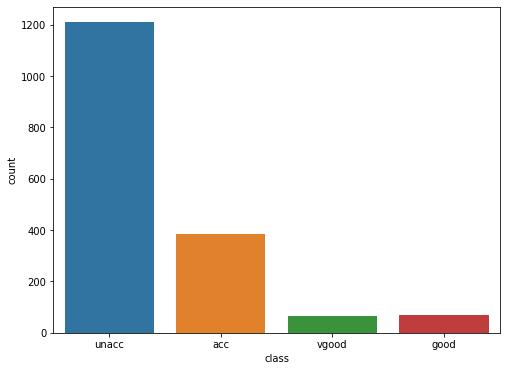

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='class',data=Car_Data)

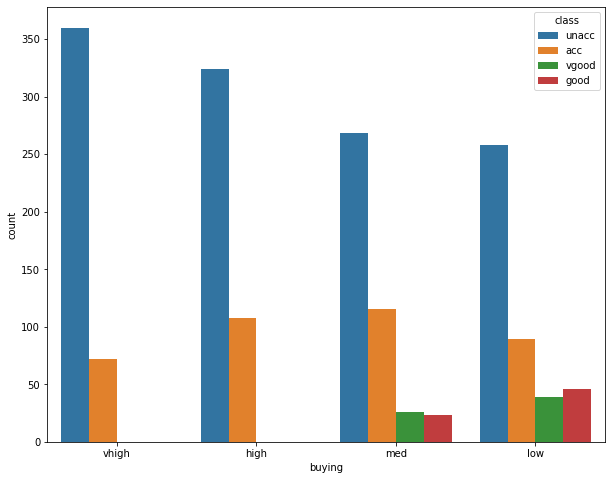

In [ ]:
fig, ax =plt.subplots(figsize=(10,8)) 
sns.countplot(Car_Data['buying'], hue = Car_Data['class'],ax=ax)
plt.show()

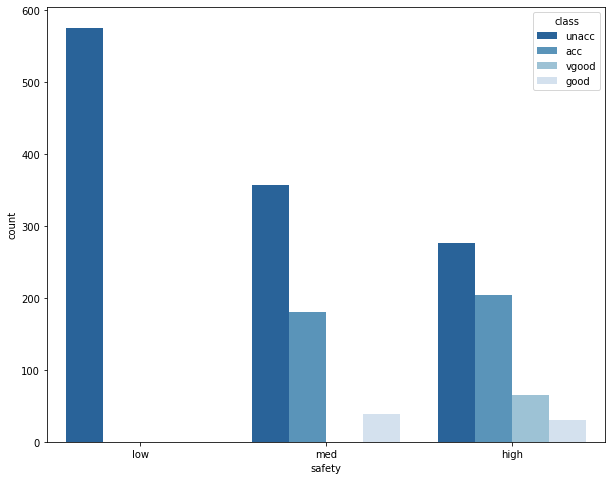

In [ ]:
fig, ax =plt.subplots(figsize=(10,8)) 
sns.countplot(Car_Data['safety'], hue = Car_Data['class'],ax=ax,palette='Blues_r')
plt.show()

In [ ]:
data = Car_Data.copy()

In [ ]:
data['class'],class_names = pd.factorize(data['class'])

In [ ]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [ ]:
#Creating the variable x and y
x = data.drop('class', axis=1)
y = data['class']

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.3,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1209, 6)
(1209,)
(519, 6)
(519,)


In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

In [ ]:
kmeans = KMeans(n_clusters = 2,random_state=0)

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
    X_train= x.iloc[train_index]
    X_test = x.iloc[test_index]
    y_train = y[train_index]
    y_test= y[test_index]
    
    kmeans.fit(X_train)
    y_pred= kmeans.predict(X_test)
    #y_prob= kmeans.predict_proba(X_test)

    predicted=kmeans.predict(X_test)
    cm = confusion_matrix(y_test,predicted)
    print("Confusion Matrix: ")
    print(cm)
    print("\n")
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
    print('Sensitivity for class 1: ', sensitivity )
    SensitivityClass1.append(sensitivity)

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
    print('Sensitivity for class 2: ', sensitivity )
    SensitivityClass2.append(sensitivity)

    sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
    print('Sensitivity for class 3: ', sensitivity )
    SensitivityClass3.append(sensitivity)

    sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
    print('Sensitivity for class 4: ', sensitivity )
    SensitivityClass4.append(sensitivity)
    #----------------------------------------------------------------------
    print("\n")
    specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
    print('Specificity for class 1: ', specificity)
    SpecificityClass1.append(specificity)

    specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
    print('Specificity for class 2: ', specificity)
    SpecificityClass2.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
    print('Specificity for class 3: ', specificity)
    SpecificityClass3.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
    print('Specificity for class 4: ', specificity)
    SpecificityClass4.append(specificity)

#-----------------------------------------------------------------------------------
    #skplt.metrics.plot_roc(y_test, y_pred,figsize=(10,6),title_fontsize=12,text_fontsize=10)
    #plt.show()

Confusion Matrix: 
[[216  26   0   0]
 [  5  72   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  0.8925619834710744
Sensitivity for class 2:  0.935064935064935
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.935064935064935
Specificity for class 2:  0.8029739776951673
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[242   0   0   0]
 [ 77   0   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  0.0
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.0
Specificity for class 2:  0.8996282527881041
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[198  44   0   0]
 [ 26  51   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  0.8181818181818182
Sensitivity for class 2:  0.6623376623376623
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KMeans:")
print(result)
print("\n")
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for KMeans :",)
print (result1)
print("\n")
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For KMeans :",result2)
print("\n")

Confusion Matrix for KMeans:
[[118 124   0   0]
 [ 32  44   0   0]
 [  5   8   0   0]
 [  2  12   0   0]]


Classification Report for KMeans :
              precision    recall  f1-score   support

           0       0.75      0.49      0.59       242
           1       0.23      0.58      0.33        76
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        14

    accuracy                           0.47       345
   macro avg       0.25      0.27      0.23       345
weighted avg       0.58      0.47      0.49       345



Overall Accuracy For KMeans : 46.95652173913044




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for train_index, test_index in kfold.split(x,y):
  kmeans.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = kmeans.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = kmeans.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
KMeans_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("KMeans model accuracy(in %) for Training:",KMeans_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
KMeans_Test = metrics.accuracy_score(y_test, y_pred)*100
print("KMeans model accuracy(in %) for Testing:", KMeans_Test)

KMeans model accuracy(in %) for Training: 48.300795372378886
KMeans model accuracy(in %) for Testing: 46.95652173913044


In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(y_test, y_pred, average ='weighted'))
print('Recall is: ', recall_score(y_test, y_pred,average ='weighted'))
print('F1 Score is: ', f1_score(y_test, y_pred,average ='weighted'))

Precision is:  0.5787611140899263
Recall is:  0.46956521739130436
F1 Score is:  0.48832225491264397


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 26.663766855154414
Specificity:  77.15108095427148


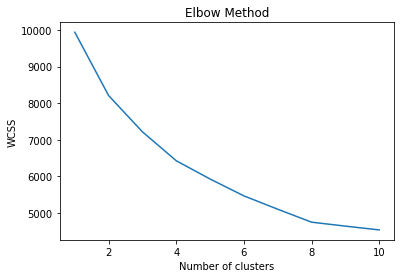

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
cmeans = FCM(n_clusters = 2)

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []



num_folds = 5
fold = KFold(n_splits = num_folds, shuffle = True)

for train_index, test_index in fold.split(x):
    X_train= x.iloc[train_index]
    X_test = x.iloc[test_index]
    y_train = y[train_index]
    y_test= y[test_index]
    
    cmeans.fit(X_train.to_numpy())
    y_pred= cmeans.predict(X_test.to_numpy())
    #y_prob= kmeans.predict_proba(X_test)

    predicted=cmeans.predict(X_test.to_numpy())
    cm = confusion_matrix(y_test,predicted)
    print("Confusion Matrix: ")
    print(cm)
    print("\n")
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
    print('Sensitivity for class 1: ', sensitivity )
    SensitivityClass1.append(sensitivity)

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
    print('Sensitivity for class 2: ', sensitivity )
    SensitivityClass2.append(sensitivity)

    sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
    print('Sensitivity for class 3: ', sensitivity )
    SensitivityClass3.append(sensitivity)

    sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
    print('Sensitivity for class 4: ', sensitivity )
    SensitivityClass4.append(sensitivity)
    #----------------------------------------------------------------------
    print("\n")
    specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
    print('Specificity for class 1: ', specificity)
    SpecificityClass1.append(specificity)

    specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
    print('Specificity for class 2: ', specificity)
    SpecificityClass2.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
    print('Specificity for class 3: ', specificity)
    SpecificityClass3.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
    print('Specificity for class 4: ', specificity)
    SpecificityClass4.append(specificity)

#-----------------------------------------------------------------------------------

Confusion Matrix: 
[[ 91 136   0   0]
 [ 47  38   0   0]
 [ 12   8   0   0]
 [  9   5   0   0]]


Sensitivity for class 1:  0.4008810572687225
Sensitivity for class 2:  0.4470588235294118
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.3584905660377358
Specificity for class 2:  0.37916666666666665
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[126 128   0   0]
 [ 36  32   0   0]
 [  2   7   0   0]
 [  5  10   0   0]]


Sensitivity for class 1:  0.49606299212598426
Sensitivity for class 2:  0.47058823529411764
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.4266666666666667
Specificity for class 2:  0.46494464944649444
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[111 139   0   0]
 [ 44  34   0   0]
 [  9   0   0   0]
 [  9   0   0   0]]


Sensitivity for class 1:  0.444
Sensitivity for class 2:  0.4358974358974359
Sensitivity for class

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for CMeans:")
print(result)
print("\n")
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for CMeans :",)
print (result1)
print("\n")
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For CMeans :",result2)
print("\n")

Confusion Matrix for CMeans:
[[110 122   0   0]
 [ 44  37   0   0]
 [  6   9   0   0]
 [ 12   5   0   0]]


Classification Report for CMeans :
              precision    recall  f1-score   support

           0       0.64      0.47      0.54       232
           1       0.21      0.46      0.29        81
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        17

    accuracy                           0.43       345
   macro avg       0.21      0.23      0.21       345
weighted avg       0.48      0.43      0.43       345



Overall Accuracy For CMeans : 42.608695652173914




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for train_index, test_index in kfold.split(x,y):
  cmeans.fit(X_train.to_numpy())
  #Making the prediction on X_test
  y_pred = cmeans.predict(X_test.to_numpy())
  #Making the prediction on X_train
  y_pred1 = cmeans.predict(X_train.to_numpy())

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
CMeans_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("CMeans model accuracy(in %) for Training:",CMeans_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
CMeans_Test = metrics.accuracy_score(y_test, y_pred)*100
print("CMeans model accuracy(in %) for Testing:", CMeans_Test)

CMeans model accuracy(in %) for Training: 43.23933477946493
CMeans model accuracy(in %) for Testing: 47.2463768115942


In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(y_test, y_pred, average ='weighted'))
print('Recall is: ', recall_score(y_test, y_pred,average ='weighted'))
print('F1 Score is: ', f1_score(y_test, y_pred,average ='weighted'))

Precision is:  0.5077294685990338
Recall is:  0.47246376811594204
F1 Score is:  0.47460334089983125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 23.27320136228182
Specificity:  73.40439796192008
